In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from matplotlib import cm
import jieba

java_data= pd.read_excel('C:/Users/HP/Desktop/honors project/cleaned data/51Python.xlsx')

In [16]:
fig = plt.figure(figsize=(28,21))

<Figure size 2016x1512 with 0 Axes>

In [17]:
data_counte=np.arange(30)
data_education=[]
for i in range(30):
    data_counte[i]=java_data.company_location.value_counts()[i]
    data_education.append(java_data.company_location.value_counts().index[i])


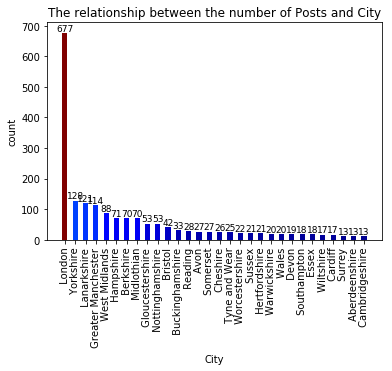

In [18]:
color = cm.jet(np.array(data_counte)/max(data_counte))
plt.bar(data_education,data_counte,width=0.5,color=color)
plt.xticks(data_education,data_education)
plt.title('The relationship between the number of Posts and City')
for a, b in zip(data_education,data_counte):
        plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=9) 
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('count')
#plt.savefig('C:/Users/HP/Desktop/honors project/cleaned data/Posts and the City.jpg')
plt.show()

In [21]:
data_counte=np.arange(15)
data_education=[]
for i in range(15):
    data_counte[i]=java_data.welfare2.value_counts()[i]
    data_education.append(java_data.welfare2.value_counts().index[i])


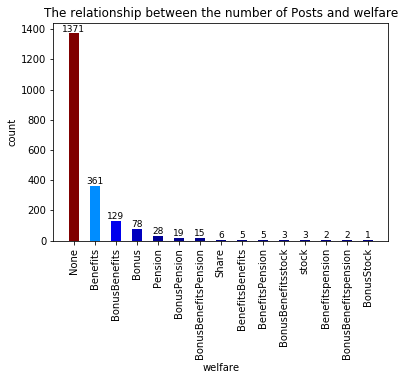

In [23]:
color = cm.jet(np.array(data_counte)/max(data_counte))
plt.bar(data_education,data_counte,width=0.5,color=color)
plt.xticks(data_education,data_education)
plt.title('The relationship between the number of Posts and welfare')
for a, b in zip(data_education,data_counte):
        plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=9) 
plt.xlabel('welfare')
plt.xticks(rotation=90)
plt.ylabel('count')
#plt.savefig('C:/Users/HP/Desktop/honors project/cleaned data/Posts and the City.jpg')
plt.show()

In [25]:
group_location = java_data.groupby('welfare2')
avg_salary_min = group_location.aggregate({'min salary':np.mean}).sort_values('min salary', ascending = False)
avg_salary_max = group_location.aggregate({'max salary':np.mean}).sort_values('max salary', ascending = False)
print(avg_salary_max)
print(avg_salary_min)

                          max salary
welfare2                            
BonusBenefitsstock     108333.333333
stock                  106666.666667
BenefitsBonusesShare    88000.000000
Benefitsshares          85000.000000
BonusBenefitsBenefits   80000.000000
BenefitsBenefits        76000.000000
BonusBenefits           73128.171875
BonusBenefitsPension    71666.666667
Share                   70833.333333
Bonusshare              70000.000000
None                    67277.243331
BonusBonus              65000.000000
BonusStock              65000.000000
Benefits                63960.518006
BonusPension            63157.894737
Bonus                   62769.230769
BonusBenefitspension    62500.000000
Pension                 60675.214286
Benefitsstock           60000.000000
BenefitsPension         57693.400000
Benefitspension         57500.000000
LotsofFlexibility       55000.000000
Package                 50000.000000
                          min salary
welfare2                            
B

In [40]:
sum=''
for a in data:
    sum=sum+a
    

In [41]:
en=re.sub(u"[\u4e00-\u9fa5。，、；（*.,？）3-9【】★+：:《》]"," ",sum)
en=str(en)
filename = 'write_data.txt'
with open(filename,'w') as f:
    f.write(en)

In [42]:
info = jieba.cut(en,cut_all=False)

dic={}
for i in info:
        if re.findall(r'[\u4e00-\u9fa5_a-zA-Z0-9_]{2,}',i):####如果是英文，就将其首部大写，其余小写（防止出现python/Python，明明是一个关键字却占两个键）
            i=i.capitalize()

        if i not in dic:####统计各个关键字出现的次数
            dic[i]=1
        else:
            dic[i]+=1


In [43]:
import re
result=dict()
for k in dic:
    if re.findall('[a-z,A-Z]{2,}',k):####匹配出大于两个字的中文或者英文
        result[k]=dic[k]
        
        
s=sorted( result.items(),key=lambda p:p[1],reverse=True)##按照出现的次数进行排序
s


[('Python', 1451),
 ('Linux', 485),
 ('Mysql', 430),
 ('Web', 312),
 ('Django', 308),
 ('Redis', 264),
 ('Flask', 235),
 ('Java', 179),
 ('Sql', 150),
 ('Mongodb', 148),
 ('Http', 123),
 ('Html', 116),
 ('Tornado', 116),
 ('Shell', 105),
 ('Css', 99),
 ('Javascript', 99),
 ('Git', 95),
 ('Tcp', 92),
 ('None1', 85),
 ('Ip', 75),
 ('Js', 72),
 ('Pythonweb', 71),
 ('Postgresql', 71),
 ('Oracle', 70),
 ('Vue', 69),
 ('Docker', 69),
 ('Jquery', 62),
 ('Pandas', 61),
 ('Numpy', 56),
 ('Scrapy', 55),
 ('Nginx', 53),
 ('Odoo', 52),
 ('Hadoop', 45),
 ('Nosql', 44),
 ('Kafka', 44),
 ('Ajax', 43),
 ('Ai', 42),
 ('Spark', 40),
 ('Bootstrap', 40),
 ('None', 40),
 ('Unix', 39),
 ('Restful', 38),
 ('Svn', 38),
 ('Php', 37),
 ('Tensorflow', 35),
 ('Devops', 35),
 ('Sqlserver', 34),
 ('App', 33),
 ('Api', 33),
 ('Xpath', 32),
 ('Openstack', 32),
 ('Socket', 31),
 ('Go', 31),
 ('Rabbitmq', 30),
 ('Celery', 29),
 ('Elasticsearch', 28),
 ('Golang', 27),
 ('Bug', 27),
 ('It', 27),
 ('Hive', 26),
 ('Restful

In [30]:
filename = 'write_data1.txt'
with open(filename,'w') as f:
    f.write(sum)